<H1> Improving Model by Adding Data Augmentation </H1>

To reduce overfitting, we agreed that adding more data can help. Even if our model isn't overfitting, it's beneficial to add more data if possible. However, collecting and preprocessing data can be challenging. What if we could generate new data from our existing data? With 60K images, we can create many more.

Useful random augmentations include horizontal flips, slight shifts, and small zooms or crops. This can be done in Keras using the ImageDataGenerator class.

<H1> Loading Libraries </H1>

In [4]:
# keras
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# visuals
import matplotlib.pyplot as plt

<H1>Data Preparation:</H1>

The Cifar10 dataset is loaded and split into training and testing sets.
The images are reshaped to include three channels (color) and normalized to the range [0, 1].
Labels are one-hot encoded to match the output layer of the network.

In [2]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

<H1> Adding Data Augmentation: </H1>


In [5]:
# declare some important variables
BATCH_SIZE = 64
EPOCHS = 50

In [10]:
# Data Augementation
datagen = ImageDataGenerator(rotation_range=10,
                             horizontal_flip=True,
                             width_shift_range=0.1,
                             height_shift_range=0.1
                            )
train_gen = datagen.flow(X_train,y_train,batch_size=64)

In [7]:
# Define the CNN model
simple_model = models.Sequential()

# 3 block vgg style model 
# Base of the model

# block 1
simple_model.add(layers.Conv2D(32,(3,3),activation='relu',padding='same',input_shape = (32,32,3)))
simple_model.add(layers.Conv2D(32,(3,3),activation='relu',padding='same'))
simple_model.add(layers.MaxPooling2D((2, 2)))

# block 2
simple_model.add(layers.Conv2D(64,(3,3),activation='relu',padding='same'))
simple_model.add(layers.Conv2D(64,(3,3),activation='relu',padding='same'))
simple_model.add(layers.MaxPooling2D((2, 2)))

# block 3
simple_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
simple_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
simple_model.add(layers.MaxPooling2D((2, 2)))

# head of the model
simple_model.add(layers.Flatten())
simple_model.add(layers.Dense(128, activation='relu'))
simple_model.add(layers.Dense(10, activation='softmax'))

In [8]:
simple_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

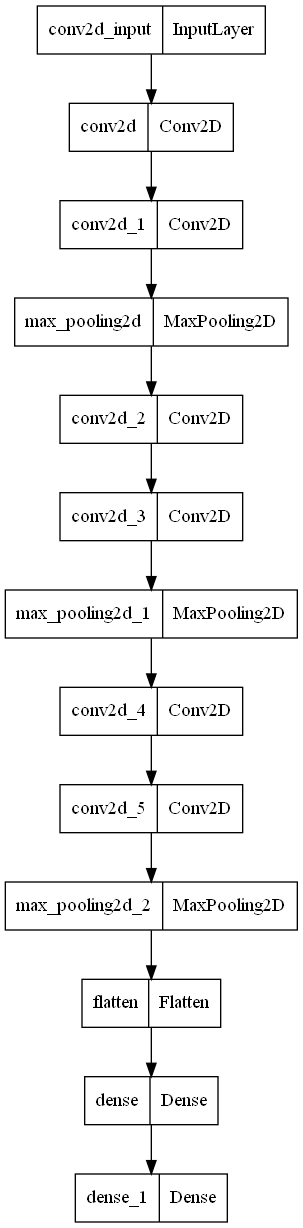

In [9]:
plot_model(simple_model)

<H1> Model Training: </H1>

The model is compiled with the Adam optimizer and categorical cross-entropy loss function.
The fit function trains the model using the training data and evaluates it on the test data for EPOCHS epochs with a batch size of BATCH_SIZE

In [12]:
# Compile the model
simple_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
hist_train = simple_model.fit(train_gen,
                            validation_data=(X_train, y_train), 
                            epochs=EPOCHS, 
                            batch_size=BATCH_SIZE
                            )


Epoch 1/50
782/782 [==============================] - 25s 27ms/step - loss: 1.6716 - accuracy: 0.3827 - val_loss: 1.2834 - val_accuracy: 0.5328
Epoch 2/50
782/782 [==============================] - 20s 26ms/step - loss: 1.2419 - accuracy: 0.5543 - val_loss: 1.1169 - val_accuracy: 0.6127
Epoch 3/50
782/782 [==============================] - 21s 27ms/step - loss: 1.0505 - accuracy: 0.6257 - val_loss: 0.9858 - val_accuracy: 0.6490
Epoch 4/50
782/782 [==============================] - 21s 27ms/step - loss: 0.9402 - accuracy: 0.6662 - val_loss: 0.9074 - val_accuracy: 0.6809
Epoch 5/50
782/782 [==============================] - 22s 28ms/step - loss: 0.8521 - accuracy: 0.6996 - val_loss: 0.7408 - val_accuracy: 0.7394
Epoch 6/50
782/782 [==============================] - 20s 26ms/step - loss: 0.7851 - accuracy: 0.7239 - val_loss: 0.7097 - val_accuracy: 0.7553
Epoch 7/50
782/782 [==============================] - 21s 27ms/step - loss: 0.7374 - accuracy: 0.7407 - val_loss: 0.6945 - val_accuracy:

In [13]:
def myplot( hist ):
    # summarize history for accuracy
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title("Accuracy by VGG3 on CIFAR-10 Data")
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Loss by VGG3 on CIFAR-10 Data')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'])
    plt.show()

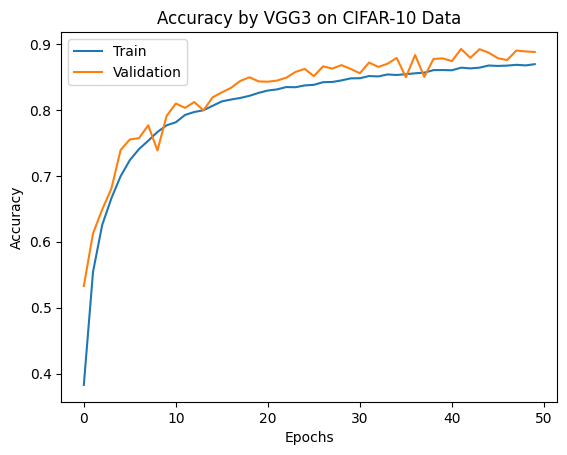

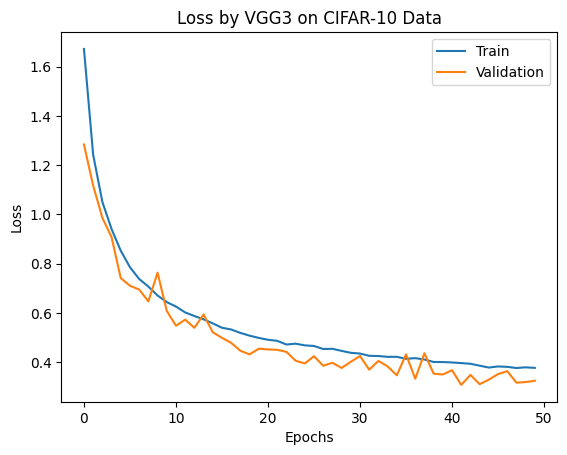

In [14]:
myplot(hist_train)

In [15]:
simple_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5506 - accuracy: 0.8348


[0.5505831837654114, 0.8348000049591064]